<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Modeltf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install joblib
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow


In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:
## 64 BIT (2253,4016)

with open('/content/drive/My Drive/ffeatures64.bin','rb') as file:
  features = pickle.load(file)
with open('/content/drive/My Drive/flabels64.bin','rb') as file:
  labels = pickle.load(file)


In [0]:
## 48 BIT (2253,2315)
'''
features = joblib.load('/content/features48.pkl')
labels = joblib.load('/content/labels48.pkl')
'''

In [0]:
## 56 BIT (2253,3147)

# features = joblib.load('/content/features56.pkl')
# labels = joblib.load('/content/labels56.pkl')


In [0]:
## 64 BIT (2253,3147)

features = joblib.load('/content/features64.pkl')
labels = joblib.load('/content/labels64.pkl')


In [0]:
## 32 BIT (2253,1035)

# features = joblib.load('/content/features32.pkl')
# labels = joblib.load('/content/labels32.pkl')

In [0]:
## 16 BIT (2253,267)
'''
features = joblib.load('/content/features16.pkl')
labels = joblib.load('/content/labels16.pkl')
'''

"\nfeatures = joblib.load('/content/features16.pkl')\nlabels = joblib.load('/content/labels16.pkl')\n"

In [10]:
# print(features[0])
# print(len(features[0]))
# print(len(features))
print(np.shape(features))

(2253, 4106)


In [0]:
## TEST SET 

x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
tf.reset_default_graph()

In [51]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8755771567418998017
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1938221799520875038
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13389358804679374674
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14892276122
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14271081408537424311
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
x = tf.placeholder(shape = (None,4106), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'target')

wh = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((4106, 6500)))
bh = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,6500)))

#out

wo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((6500,1)))
bo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,1)))


In [0]:
hidl = tf.add(tf.matmul(x,wh),bh, name ='hidden1')

In [0]:
outl_batch = tf.compat.v1.layers.batch_normalization(hidl)
outl = tf.add(tf.matmul(outl_batch,wo),bo,name = 'output')


Add additional custom loss functions if necc 
reducing mean sqaure error 
1. reducing max deviation 

In [0]:
loss = tf.reduce_mean(tf.square(tf.subtract(y,outl))) + 0.4*tf.reduce_max(tf.subtract(y,outl))
#default lr = 0.001
opt = tf.train.AdamOptimizer(name = 'optimizer')
op_train = opt.minimize(loss, name ='train_op')



In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

3103.3293	49314.977
53273.44	3809.6848
4105.0796	8273.717
11648.2705	24582.646
26590.81	16632.541
17495.875	5154.501
4924.413	156.82396
298.42758	3365.6184
3266.0588	8094.0913
8607.727	9417.014
8322.259	5959.3696
6838.846	3334.2913
3098.4204	1229.1067
884.4473	237.27625
343.68402	2877.0989
3052.2886	4254.2275
3368.5967	2979.679
4106.649	2637.346
3711.9956	2191.1733
1669.5741	1888.5004
2056.5955	1124.4875
311.5816	857.8745
723.7497	509.93494
794.7647	1101.261
911.8172	1439.81
1214.9039	1662.3707
1851.0385	1170.239
1404.2621	918.57886
1030.2734	916.8815
1303.832	1104.7451
775.64813	1059.097
667.6178	287.9296
906.7702	200.3898
430.97638	1414.2771
381.38727	575.50885
1187.3167	1364.1556
2389.6614	1161.7451
660.2943	415.1147
210.32098	1287.8711
574.274	335.6385
342.1372	758.9892
223.13814	674.5676
710.74335	73.70595
1708.5767	721.302
372.43253	329.02246
817.76025	837.8456
771.9363	989.2928
885.68604	1461.1226
831.27594	1321.8105
1163.6389	1781.791
760.41406	389.64618
401.51212	268.576
317.9

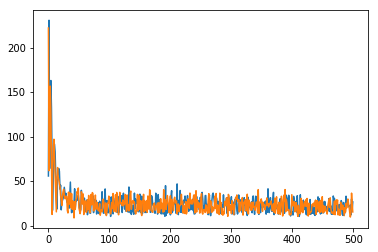

In [64]:
train=[]
val=[]

with tf.device('/device:CPU:0'):
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    mini =[]
    for i in range(0,500):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
      #TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
      z= sess.run([loss,op_train, update_ops], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0]**0.5)
      
      ##VALIDATION LOSS
      
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0]**0.5)
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    plt.plot(train)
    plt.plot(val)
    
    model = simple_save(sess,'/content/drive/My Drive/Custom_Models/dump_batch_2',inputs = {'input' : x}, outputs = {'output': outl})
    print('Saved model!')
    
 

In [24]:
print(z)

[665.58075, None]


[<tf.Tensor 'add:0' shape=() dtype=float32>]


In [0]:
with open('/content/drive/My Drive/Custom_Models/graph1000_64updhidden.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())

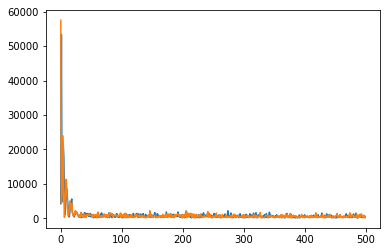

In [0]:
plt.plot(train)
plt.plot(val)

In [63]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(4106, 6500) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(1, 6500) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(6500, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/gamma:0' shape=(6500,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/beta:0' shape=(6500,) dtype=float32_ref>]

In [0]:
with open('/content/drive/My Drive/Custom_Models/graph1000_updatedloss.pb', 'rb') as f:
  g1 = f.read()
with open('/content/drive/My Drive/Custom_Models/graph1000.pb', 'rb') as f:
  g2 = f.read()

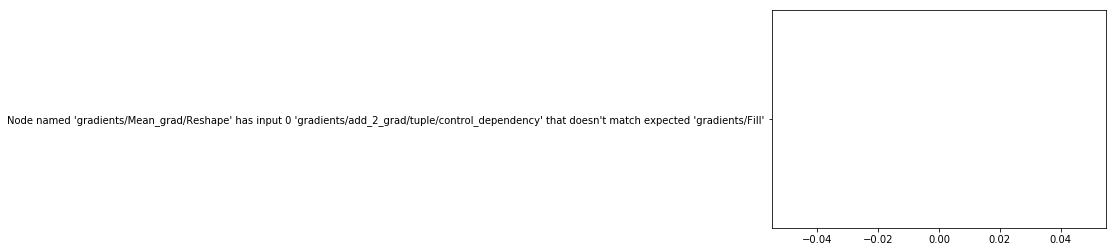

In [0]:
diff = pywrap_tensorflow.EqualGraphDefWrapper(g1,g2) 
#plt.plot(diff)

56

400